In [65]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [66]:
data = pd.read_csv("bengaluru_house_prices.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [67]:
data.info()
# data having 13320 entries.
# 9 variables, 3 float, 6 object type
# location having 1 null value
# size, society, bath, balcony having some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [68]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [70]:
# list of columns
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# Data wrangling and EDA on dataset

In [71]:
# let's see location
print(len(list(data["location"].unique())))
data["location"].unique()
# data is available for 1306 unique localities

1306


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [72]:
data["location"].value_counts()
# large property in whitefield

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [73]:
data["location"].isnull().sum()
# 1 null value in location, drop this row

1

In [74]:
data = data.dropna(subset = ['location'])
data['location'].isnull().sum()

0

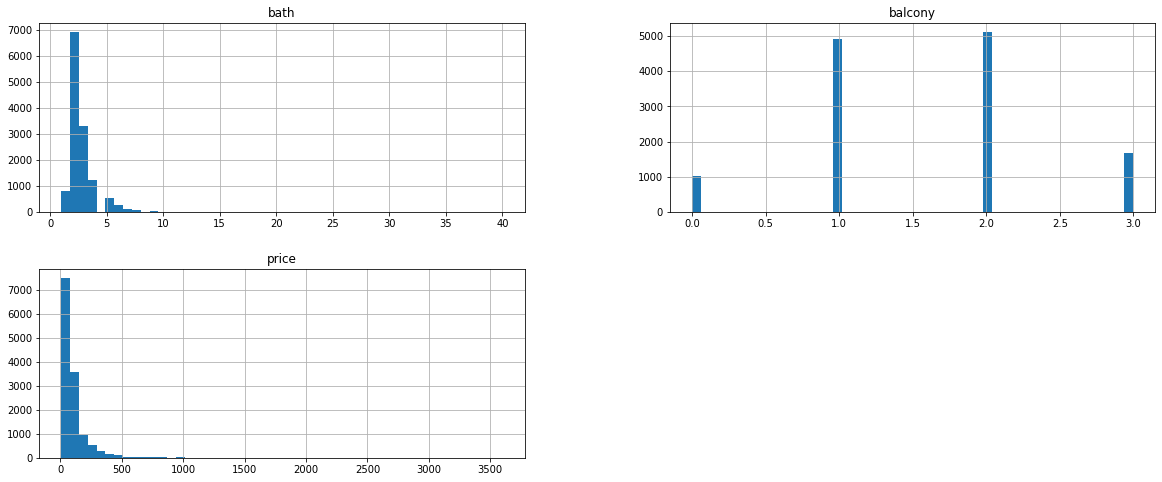

In [76]:
# histogram for numerical variables
data.hist(bins=50, figsize =(20,8))
plt.show()

In [77]:
# see what's area 
data["area_type"].unique()
# we have 4 type of area of property-> 'Super built-up  Area', 'Plot  Area', 'Built-up  Area','Carpet  Area'

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [78]:
data["area_type"].value_counts()
# most property belongs to super build up area followed by build-up , plot and carpet area.

Super built-up  Area    8789
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

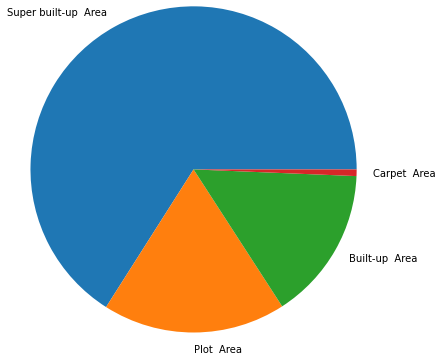

In [79]:
plt.pie(data["area_type"].value_counts(),labels=['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], radius=1.5)
plt.show()

In [80]:
# let's see total_sqft
print(list(data["total_sqft"].unique()))

['1056', '2600', '1440', '1521', '1200', '1170', '2732', '3300', '1310', '1020', '1800', '2785', '1000', '1100', '2250', '1175', '1180', '1540', '2770', '600', '1755', '2800', '1767', '510', '1250', '660', '1610', '1151', '1025', '2100 - 2850', '1075', '1760', '1693', '1925', '700', '1070', '1724', '1290', '1143', '1296', '1254', '1330.74', '970', '1459', '800', '869', '1270', '1670', '2010', '1185', '1600', '3010 - 3410', '1500', '1407', '840', '4395', '845', '5700', '1160', '3000', '1140', '1220', '1350', '1005', '500', '1358', '1569', '1240', '2089', '1206', '1150', '2511', '460', '4400', '1660', '2957 - 3450', '1326', '1325', '1499', '1665', '708', '1060', '710', '1450', '2894', '1330', '2502', '650', '2400', '1007', '966', '1630', '1640', '782', '1260', '1413', '1116', '1530', '3700', '2497', '1436', '276', '1427', '2061', '3067 - 8156', '2650', '1282', '1050', '945', '950', '1870', '880', '1535', '1360', '1042 - 1105', '1280', '5000', '3050', '1563.05', '1167', '4000', '1828', '8

In [81]:
Total_sqft = pd.to_numeric(data.total_sqft, errors='coerce')
idx = Total_sqft.isna()
print(list(data[idx]["total_sqft"]))
# here we can see we have total_sqft is of type object and this also include range 
#values also some in other unit like yard, Cents, Guntha, Acre

# we need to handle this raw data somehow

['2100 - 2850', '3010 - 3410', '2957 - 3450', '3067 - 8156', '1042 - 1105', '1145 - 1340', '1015 - 1540', '1520 - 1740', '34.46Sq. Meter', '1195 - 1440', '1200 - 2400', '4125Perch', '1120 - 1145', '4400 - 6640', '3090 - 5002', '4400 - 6800', '1160 - 1195', '1000Sq. Meter', '4000 - 5249', '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285', '3606 - 5091', '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093', '1440 - 1884', '716Sq. Meter', '547.34 - 827.31', '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800', '660 - 670', '4000 - 5249', '1500Sq. Meter', '620 - 933', '142.61Sq. Meter', '2695 - 2940', '2000 - 5634', '1574Sq. Yards', '3450 - 3472', '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '3630 - 3800', '1004 - 1204', '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2249.81 - 4112.19', '3436 - 3643', '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405', '1200 - 2400', '1500 - 2400', '117Sq. Yards', '934 - 1437', '980 - 1030', '1

In [82]:
# handle all these unit conversion and range values
import re
for i in range(len(data)):
    val = data['total_sqft'].values[i]
    # handle range -
    if '-' in val :
        arr = val.split()
        new_val = str((float(arr[0]) + float(arr[2]))/2)
        data['total_sqft'].values[i] = new_val
        
     # handle Sq Meter (1 meter = 3.28 ft)
    elif 'Sq. Meter' in val :
        ind = re.search('S', val)
        new_val = str(float(val[0:ind.span()[0]])*3.28)
        data['total_sqft'].values[i] = new_val
        
    # handle Sq. Yards (1 yard = 3 ft)
    elif 'Sq. Yards' in val :
        ind = re.search('S', val)
        new_val = str(float(val[0:ind.span()[0]])*3)
        data['total_sqft'].values[i] = new_val
    # handle Perch (1 Perch = 16.5 ft)
    elif 'Perch' in val :
        ind = re.search('P', val)
        new_val = str(float(val[0:ind.span()[0]])*16.5)
        data['total_sqft'].values[i] = new_val
     # handle Acres (1 acre = 43560 ft)
    elif 'Acres' in val :
        ind = re.search('A', val)
        new_val = str(float(val[0:ind.span()[0]])*43560)
        data['total_sqft'].values[i] = new_val
    
    # handle Sq. Cents (1 Cents = 435.56 ft)
    elif 'Cents' in val :
        ind = re.search('C', val)
        new_val = str(float(val[0:ind.span()[0]])*435.56)
        data['total_sqft'].values[i] = new_val
    # handle Guntha (1 Guntha = 1089 ft)
    elif 'Guntha' in val :
        ind = re.search('G', val)
        new_val = str(float(val[0:ind.span()[0]])*1089)
        data['total_sqft'].values[i] = new_val
     # handle Grounds (1 Grounds = 2400.35 ft)
    elif 'Grounds' in val :
        ind = re.search('G', val)
        new_val = str(float(val[0:ind.span()[0]])*2400.35)
        data['total_sqft'].values[i] = new_val
        
data['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13319, dtype: object

In [83]:
# let's check again
Total_sqft = pd.to_numeric(data.total_sqft, errors='coerce')
idx = Total_sqft.isna()
print(list(data[idx]["total_sqft"]))
# processed all and converted to square feet unit

[]


In [84]:
# see what's size (object type need to remove BHK, Bedroom ) keep only digits.
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [85]:
for i in range(len(data)):
    val = str(data['size'].values[i])
    new_val = val.split()[0]
    data['size'].values[i] = new_val
data["size"].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', 'nan', '27',
       '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [86]:
data["size"].value_counts() # 2 and 3 BKH having most in dataset
# very rare data for >10BHK

2      5528
3      4856
4      1417
1       656
5       356
6       221
7       100
8        89
9        54
nan      16
10       14
11        4
27        1
19        1
16        1
43        1
14        1
12        1
13        1
18        1
Name: size, dtype: int64

In [87]:
# we have null value present in size
# these are only 16 values so better drop these
data = data.dropna(subset = ['size'])
data['size'].isnull().sum()

0

In [88]:
# balcony
data["balcony"].unique()

array([ 1.,  3., nan,  2.,  0.])

In [89]:
data["balcony"].value_counts()
# most having 2 or 3 balcony

2.0    5112
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [90]:
data["balcony"].isnull().sum()

609

In [91]:
# 609 null values, let's impute null with 0.0 balcony
data["balcony"].fillna(0.0, inplace = True)
data["balcony"].isnull().sum()

0

In [92]:
# bath
data["bath"].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [93]:
data["bath"].isnull().sum()
# here also minimal null values so let's drop these rows

73

In [94]:
data = data.dropna(subset = ['bath'])
data['bath'].isnull().sum()

0

In [95]:
data["price"]

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13246, dtype: float64

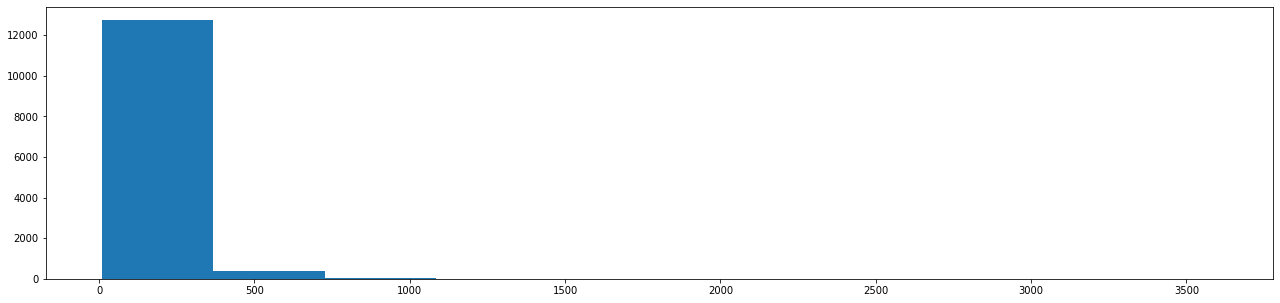

In [96]:
plt.hist(data["price"])
plt.show()

In [97]:
# availability and societyis unnecessary variable for our task so drop it
data.drop(["society","availability"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   balcony     13246 non-null  float64
 6   price       13246 non-null  float64
dtypes: float64(3), object(4)
memory usage: 827.9+ KB


# Uni and multi vrariate analysis

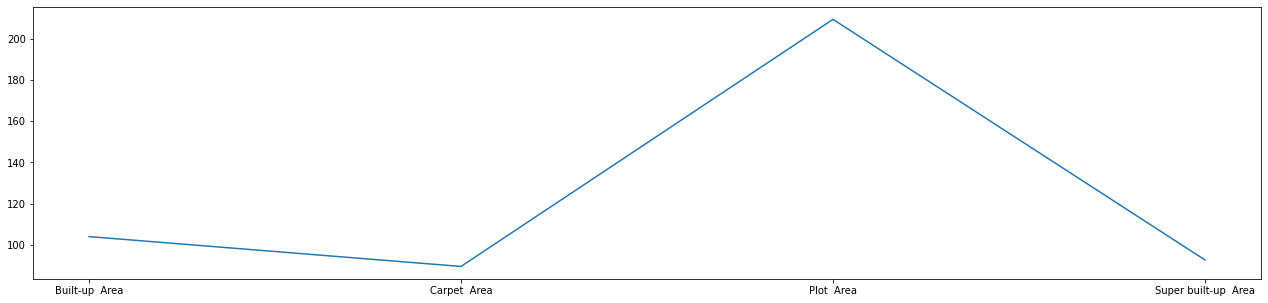

In [98]:
# let's see how price is related with other variables
# price vs area_type
plt.plot(data.groupby("area_type")["price"].mean())
plt.show()
# this is not accurate analysis that we can infer because we are taking mean value.

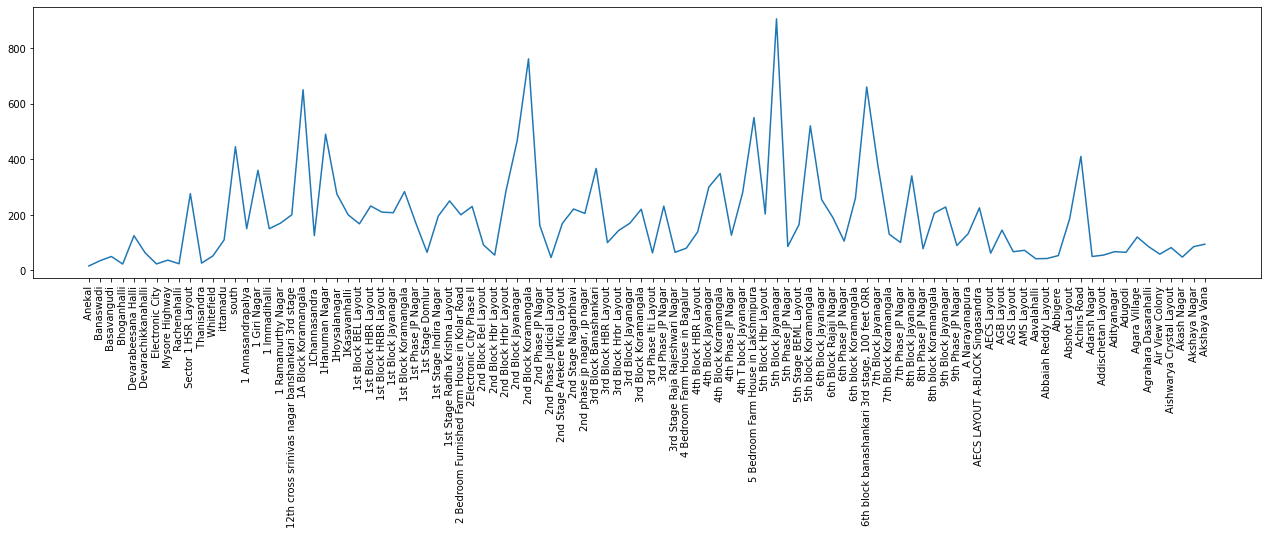

In [99]:
# price vs area_type
matplotlib.rcParams["figure.figsize"] = (22,5)
plt.plot(data.groupby("location")["price"].mean()[0:100])
plt.xticks(rotation = 90)
plt.show()
# seeing only 100 area's as can not fit all

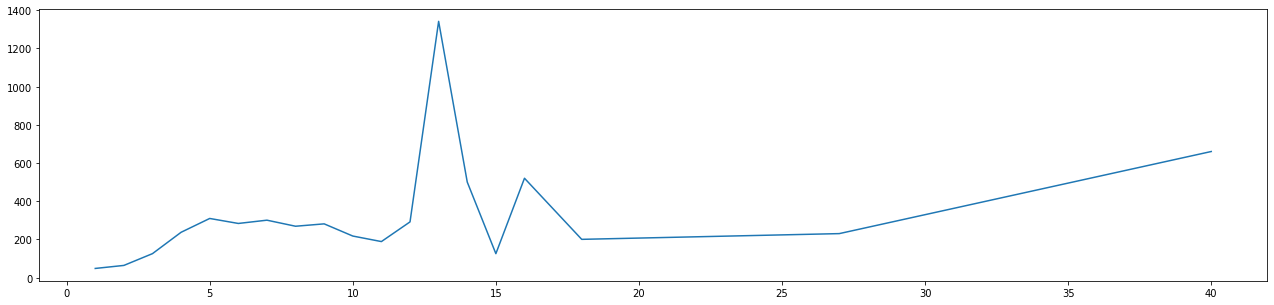

In [100]:
# price vs bath
plt.plot(data.groupby("bath")["price"].mean())
plt.show()

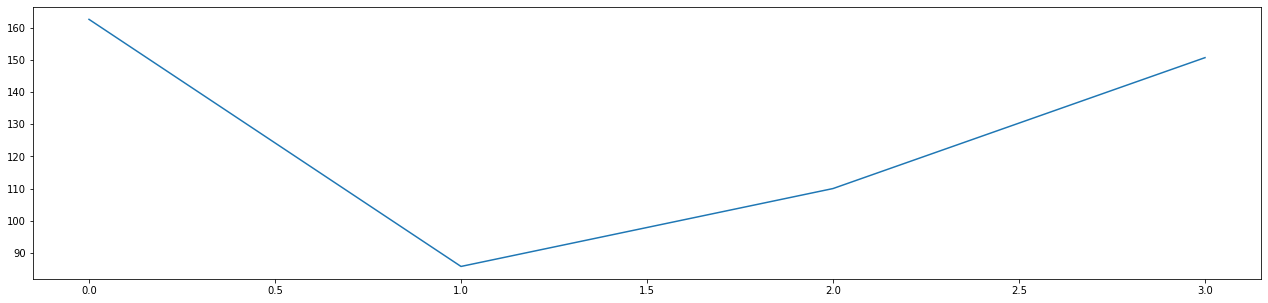

In [101]:
# price vs balcony
plt.plot(data.groupby("balcony")["price"].mean())
plt.show()

[]

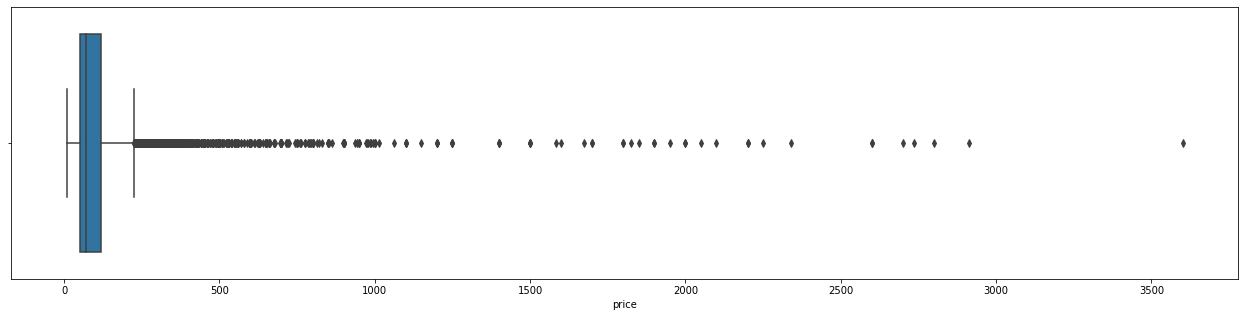

In [102]:
sns.boxplot(data['price'])
plt.plot()

In [103]:
print(data['price'].quantile([.1,.8,.9,.95,.99]))
data['price'].describe()

0.10     38.0
0.80    139.0
0.90    220.0
0.95    320.0
0.99    660.0
Name: price, dtype: float64


count    13246.000000
mean       112.389392
std        149.076587
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [104]:
# mean is 112, median is 72
# if we observe 99 percentile is also under 660 and we have many values out of this range 
# should we consider it as outlier?
# this high price will be for rich property having large area may be in Acers, which is giving meaningful information.
# for now will follow IRQ rule and will drop prices >95 percentile >320
data = data[data.price<320]
data.shape

(12578, 7)

[]

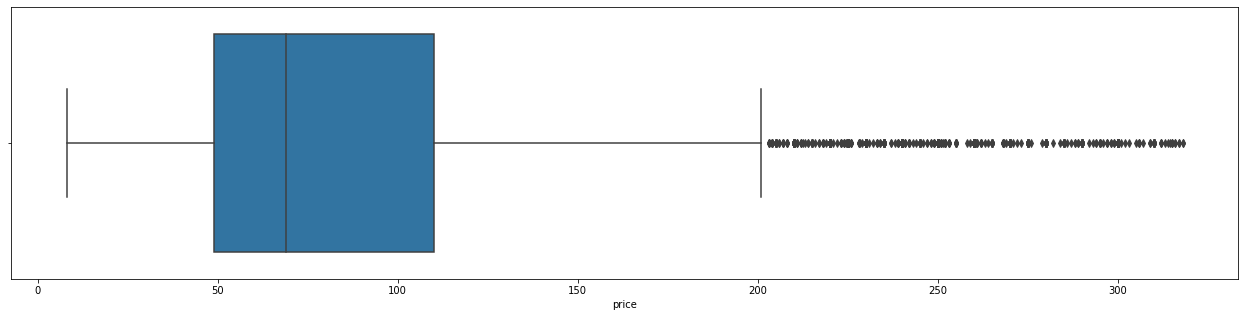

In [105]:
sns.boxplot(data['price'])
plt.plot()
# looks good and readable

In [106]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


In [107]:
# total_sqft and price alone does not give information properly 
# we are also intersted in finding price_per_sqft
# before that convert type of total_sqft to float
data['total_sqft'] = data['total_sqft'].astype('float64')
data["price_sqft"] = round(data['price']*100000/data['total_sqft']) # in rs./sq_ft
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3700.0
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4306.0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6246.0
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.0


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12578 non-null  object 
 1   location    12578 non-null  object 
 2   size        12578 non-null  object 
 3   total_sqft  12578 non-null  float64
 4   bath        12578 non-null  float64
 5   balcony     12578 non-null  float64
 6   price       12578 non-null  float64
 7   price_sqft  12578 non-null  float64
dtypes: float64(5), object(3)
memory usage: 884.4+ KB


In [109]:
# create dummy for categorical variables
# area_type
data["area_type"].unique()
# 

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [110]:
# size
data["size"].unique()

array(['2', '4', '3', '1', '8', '6', '7', '5', '9', '27', '10', '11',
       '14', '12', '13', '18'], dtype=object)

In [111]:
# location
data["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       'Tilak Nagar', '12th cross srinivas nagar banshankari 3rd stage',
       'Abshot Layout'], dtype=object)

In [112]:
# creating dummy variables 
# will have many dummy for locations
# will get rid if we do not have more than 10 data points for location in dataset will put in others
data["location"].value_counts()

Whitefield               492
Sarjapur  Road           374
Electronic City          301
Kanakpura Road           266
Thanisandra              232
                        ... 
Okalipura                  1
Old Town                   1
Vasantapura main road      1
Bapuji Layout              1
Abshot Layout              1
Name: location, Length: 1252, dtype: int64

In [113]:
print(type(data["location"].value_counts()))
location_less_than_10 = data["location"].value_counts()[data["location"].value_counts()<10]
location_less_than_10

<class 'pandas.core.series.Series'>


Giri Nagar                 9
B Narayanapura             9
Vishwanatha Nagenahalli    9
Medahalli                  9
Volagerekallahalli         9
                          ..
Okalipura                  1
Old Town                   1
Vasantapura main road      1
Bapuji Layout              1
Abshot Layout              1
Name: location, Length: 1010, dtype: int64

In [114]:
data.location = data.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(data.location.unique())

243

In [115]:
data["location"].value_counts()

other                   2614
Whitefield               492
Sarjapur  Road           374
Electronic City          301
Kanakpura Road           266
                        ... 
Ganga Nagar               10
Nagappa Reddy Layout      10
Tindlu                    10
Naganathapura             10
Nagadevanahalli           10
Name: location, Length: 243, dtype: int64

In [116]:
dummies = pd.get_dummies(data.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
data = pd.concat([data,dummies],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_sqft,Devarachikkanahalli,1st Block Jayanagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3700.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4306.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6246.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
data = data.drop('location',axis='columns')

In [119]:
dummies_area = pd.get_dummies(data.area_type)
dummies_area.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0


In [120]:
data = pd.concat([data,dummies_area],axis='columns')
data = data.drop('area_type',axis='columns')

In [121]:
data.shape

(12578, 253)

# Build the Model

In [122]:
y = data.pop("price")
x = data
print(y.shape, x.shape)

(12578,) (12578, 252)


In [123]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [124]:
from sklearn.linear_model import LinearRegression
lrClassifier = LinearRegression()
lrClassifier.fit(X_train,y_train)
lrClassifier.score(X_test,y_test)

0.46659753074654275

In [125]:
# model performed bad seems because of not handling outlier properly
# validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.46736639, 0.4618148 , 0.29540156, 0.47512655, 0.48048702])

In [126]:
# test
y_pred = lrClassifier.predict(X_test)
y_pred

array([ 85.06096224,  82.28209249,  69.02622685, ...,  90.80229043,
       123.68604847,  75.67761615])

In [127]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test,y_pred))

In [128]:
rmse

42.918405019038374

In [129]:
from sklearn.metrics import mean_absolute_error
mae = math.sqrt(mean_absolute_error(y_test,y_pred))
mae

5.326970383756113

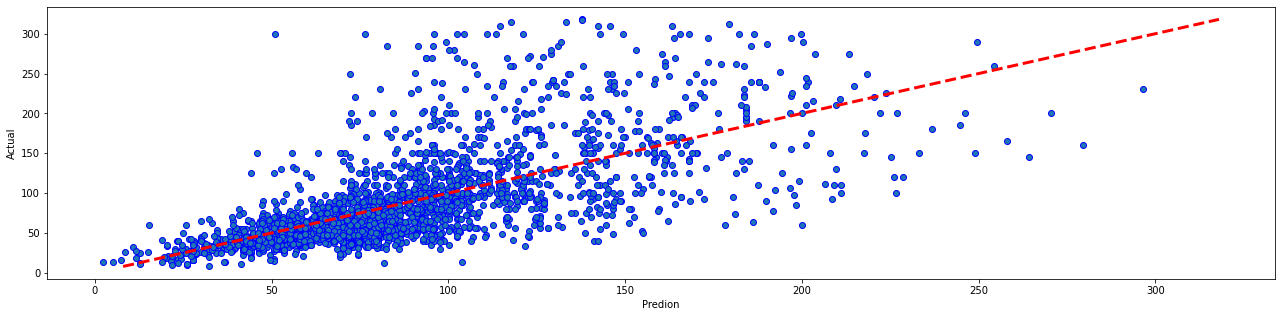

In [130]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors = (0,0,1))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=3)
ax.set_xlabel('Predion')
ax.set_ylabel('Actual')
plt.show()

In [131]:
# rmse is way more than mae because RMSE is more sensitive to outliers and high variance , it follows l2 norm.
# while MAE follow l1 norm.